In [1]:
%matplotlib inline

In [2]:
from Bio import Phylo
from io import StringIO
import numpy as np

from matplotlib import pyplot as plt

# Establish some test trees for development

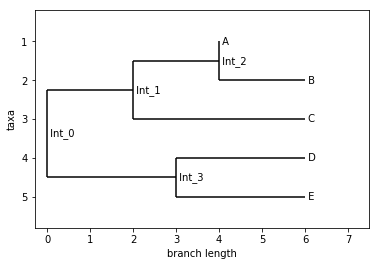

In [549]:
###Paper tree
# tree = Phylo.read(StringIO('((A:1.82, B:7.39):0.87, (D:3.61, E:26.33):1.11);'), 'newick', rooted=True)

###My Tests
# tree = Phylo.read(StringIO('(((A:2, B:2):2,C:4):2, (D:3, E:3):3);'), 'newick', rooted=True)
# tree = Phylo.read(StringIO('(((A:1.5, B:2.5):2,C:4):2, (D:3, E:3):3);'), 'newick', rooted=True)
# tree = Phylo.read(StringIO('(((A:2, B:3):2,C:4):2, (D:3, E:3):3);'), 'newick', rooted=True)
# tree = Phylo.read(StringIO('(((A:2, B:1):2,C:4):2, (D:3, E:3):3);'), 'newick', rooted=True)
# tree = Phylo.read(StringIO('(((A:2, B:2):1,C:4):2, (D:3, E:3):3);'), 'newick', rooted=True)
# tree = Phylo.read(StringIO('(((A:2, B:2):2,C:5):2, (D:3, E:3):3);'), 'newick', rooted=True)
# tree = Phylo.read(StringIO('(((A:2, B:2):2,C:3):2, (D:3, E:3):3);'), 'newick', rooted=True)

###Testing zeroe's
tree = Phylo.read(StringIO('(((A:0.000001, B:2):2,C:4):2, (D:3, E:3):3);'), 'newick', rooted=True)

###Biased tree
# tree = Phylo.read(StringIO('((((((A:0.000001,H:0.000001):0.000001,'
#                            'G:0.000001):0.000001,F:0.000001):1, B:2):2,C:4):2,'
#                            '(D:3, E:3):3);'), 'newick', rooted=True)


###Real trees
# tree = Phylo.read('/Users/adamhockenberry/Downloads/BM_Folder/paper_tree.txt', 'newick', rooted=True)
# tree = Phylo.read('/Users/adamhockenberry/Projects/Tree_rooting_analysis/Data/OMA_group_data/'
#                   'eukaryotes/processed_OMA_trees/OMAGroup_479938.treefile.RootedNoZero.MPAJH', 'newick')
bls = [i.branch_length for i in tree.get_terminals() if i.branch_length > 0.] + [10e-6]
min_bl = np.min(bls)/1000
for i in tree.get_terminals():
    if i.branch_length == 0.:
        i.branch_length = min_bl




counter=0
for internal in tree.get_nonterminals():
    internal.name = 'Int_{}'.format(counter)
    counter += 1
tree.root.branch_length = 0.0

Phylo.draw(tree)
# Phylo.draw(tree, label_func=lambda x: None)

# Tip first RelTime implementation

**Might be a faster way to do this root first but it's going to require some thought**

In [550]:
def rel_time_AJH(tree):
    """
    This closely (exactly?) follows the original implementation but note that the explanation
    of the original algorithm fails to mention what happens with zero length branches which of course
    give zero division errors"""
    depth_dict = tree.depths(unit_branch_lengths=True)
    for key in tree.get_terminals():
        del depth_dict[key]

    inv_depth_dict = {}
    for key,val in depth_dict.items():
        try:
            inv_depth_dict[val].append(key)
        except KeyError:
            inv_depth_dict[val] = [key]
            
            
    for depth in range(max(list(inv_depth_dict.keys())), -1, -1):
        for clade in inv_depth_dict[depth]:
            temp = clade.depths()
            lens = [temp[term]-clade.branch_length for term in clade.get_terminals()]
            for ds_clade in clade.clades:
                ds_lens = [temp[term]-clade.branch_length for term in ds_clade.get_terminals()]
                if np.mean(lens) > 0:
                    ds_clade.rate = np.mean(ds_lens) / np.mean(lens)
                else:
                    ds_clade.rate = 0.
                for all_ds in ds_clade.get_terminals() + ds_clade.get_nonterminals():
                    if all_ds == ds_clade:
                        pass
                    else:
                        all_ds.rate = all_ds.rate*ds_clade.rate
    return tree

In [551]:
tree = rel_time_AJH(tree)

for node in tree.get_terminals() + tree.get_nonterminals():
    if node == tree.root:
        continue
    print(node, node.rate)
    node.branch_length = node.branch_length/node.rate

A 8.571425087934482e-07
B 1.7142850173472772
C 1.1428570591836809
D 1.0714285331632667
E 1.0714285331632667
Int_1 0.9523809778911556
Int_2 0.857142937244893
Int_3 1.0714285331632667


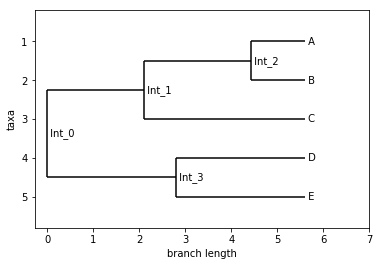

In [552]:
Phylo.draw(tree)
# Phylo.draw(tree, label_func=lambda x: None)

In [553]:
[tree.depths()[terminal] for terminal in tree.get_terminals()]

[5.600000199836925, 5.600000199999999, 5.6000002, 5.6000002, 5.6000002]

In [554]:
[tree.depths()[nonterminal] for nonterminal in tree.get_nonterminals()]

[0, 2.0999999437500034, 4.433333059027815, 2.8000001]

In [39]:
for node in tree.get_terminals() + tree.get_nonterminals():
    if node == tree.root:
        continue
    print(node)
    node.branch_length = node.rate

A
B
C
D
E
Int_1
Int_2
Int_3


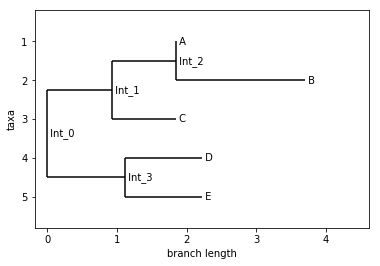

In [40]:
Phylo.draw(tree)

(array([2., 1., 1., 0., 0., 1., 0., 0., 0., 1.]),
 array([0.20077417, 0.44311684, 0.68545951, 0.92780218, 1.17014484,
        1.41248751, 1.65483018, 1.89717285, 2.13951551, 2.38185818,
        2.62420085]),
 <a list of 10 Patch objects>)

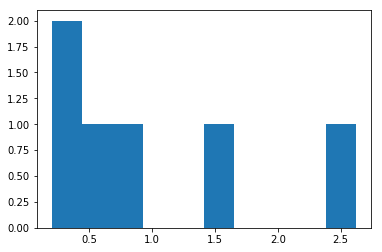

In [47]:
fig, ax = plt.subplots()
ax.hist([node.rate for node in tree.get_terminals()+tree.get_nonterminals() if node != tree.root])

In [ ]:
rate_tree = Phylo.read(StringIO(tree.format('newick')), format='newick', rooted=True)

In [ ]:
Phylo.draw(rate_tree)

In [ ]:
depth_dict = rate_tree.depths(unit_branch_lengths=True)
for key in rate_tree.get_terminals():
    del depth_dict[key]
    
inv_depth_dict = {}
for key,val in depth_dict.items():
    try:
        inv_depth_dict[val].append(key)
    except KeyError:
        inv_depth_dict[val] = [key]

In [ ]:
depth_dict

In [ ]:
inv_depth_dict

In [ ]:
# for depth in range(max(list(inv_depth_dict.keys())), min(list(inv_depth_dict.keys()))-2, -1):
for depth in range(max(list(inv_depth_dict.keys())), -1, -1):
    print(depth)
    for clade in inv_depth_dict[depth]:
        print(clade)
        temp = clade.depths()
        lens = [temp[term]-clade.branch_length for term in clade.get_terminals()]
        print(lens)
        for terminal in clade.get_terminals():
            terminal.branch_length = terminalnp.mean(lens)
            
#             print(terminal)
            
